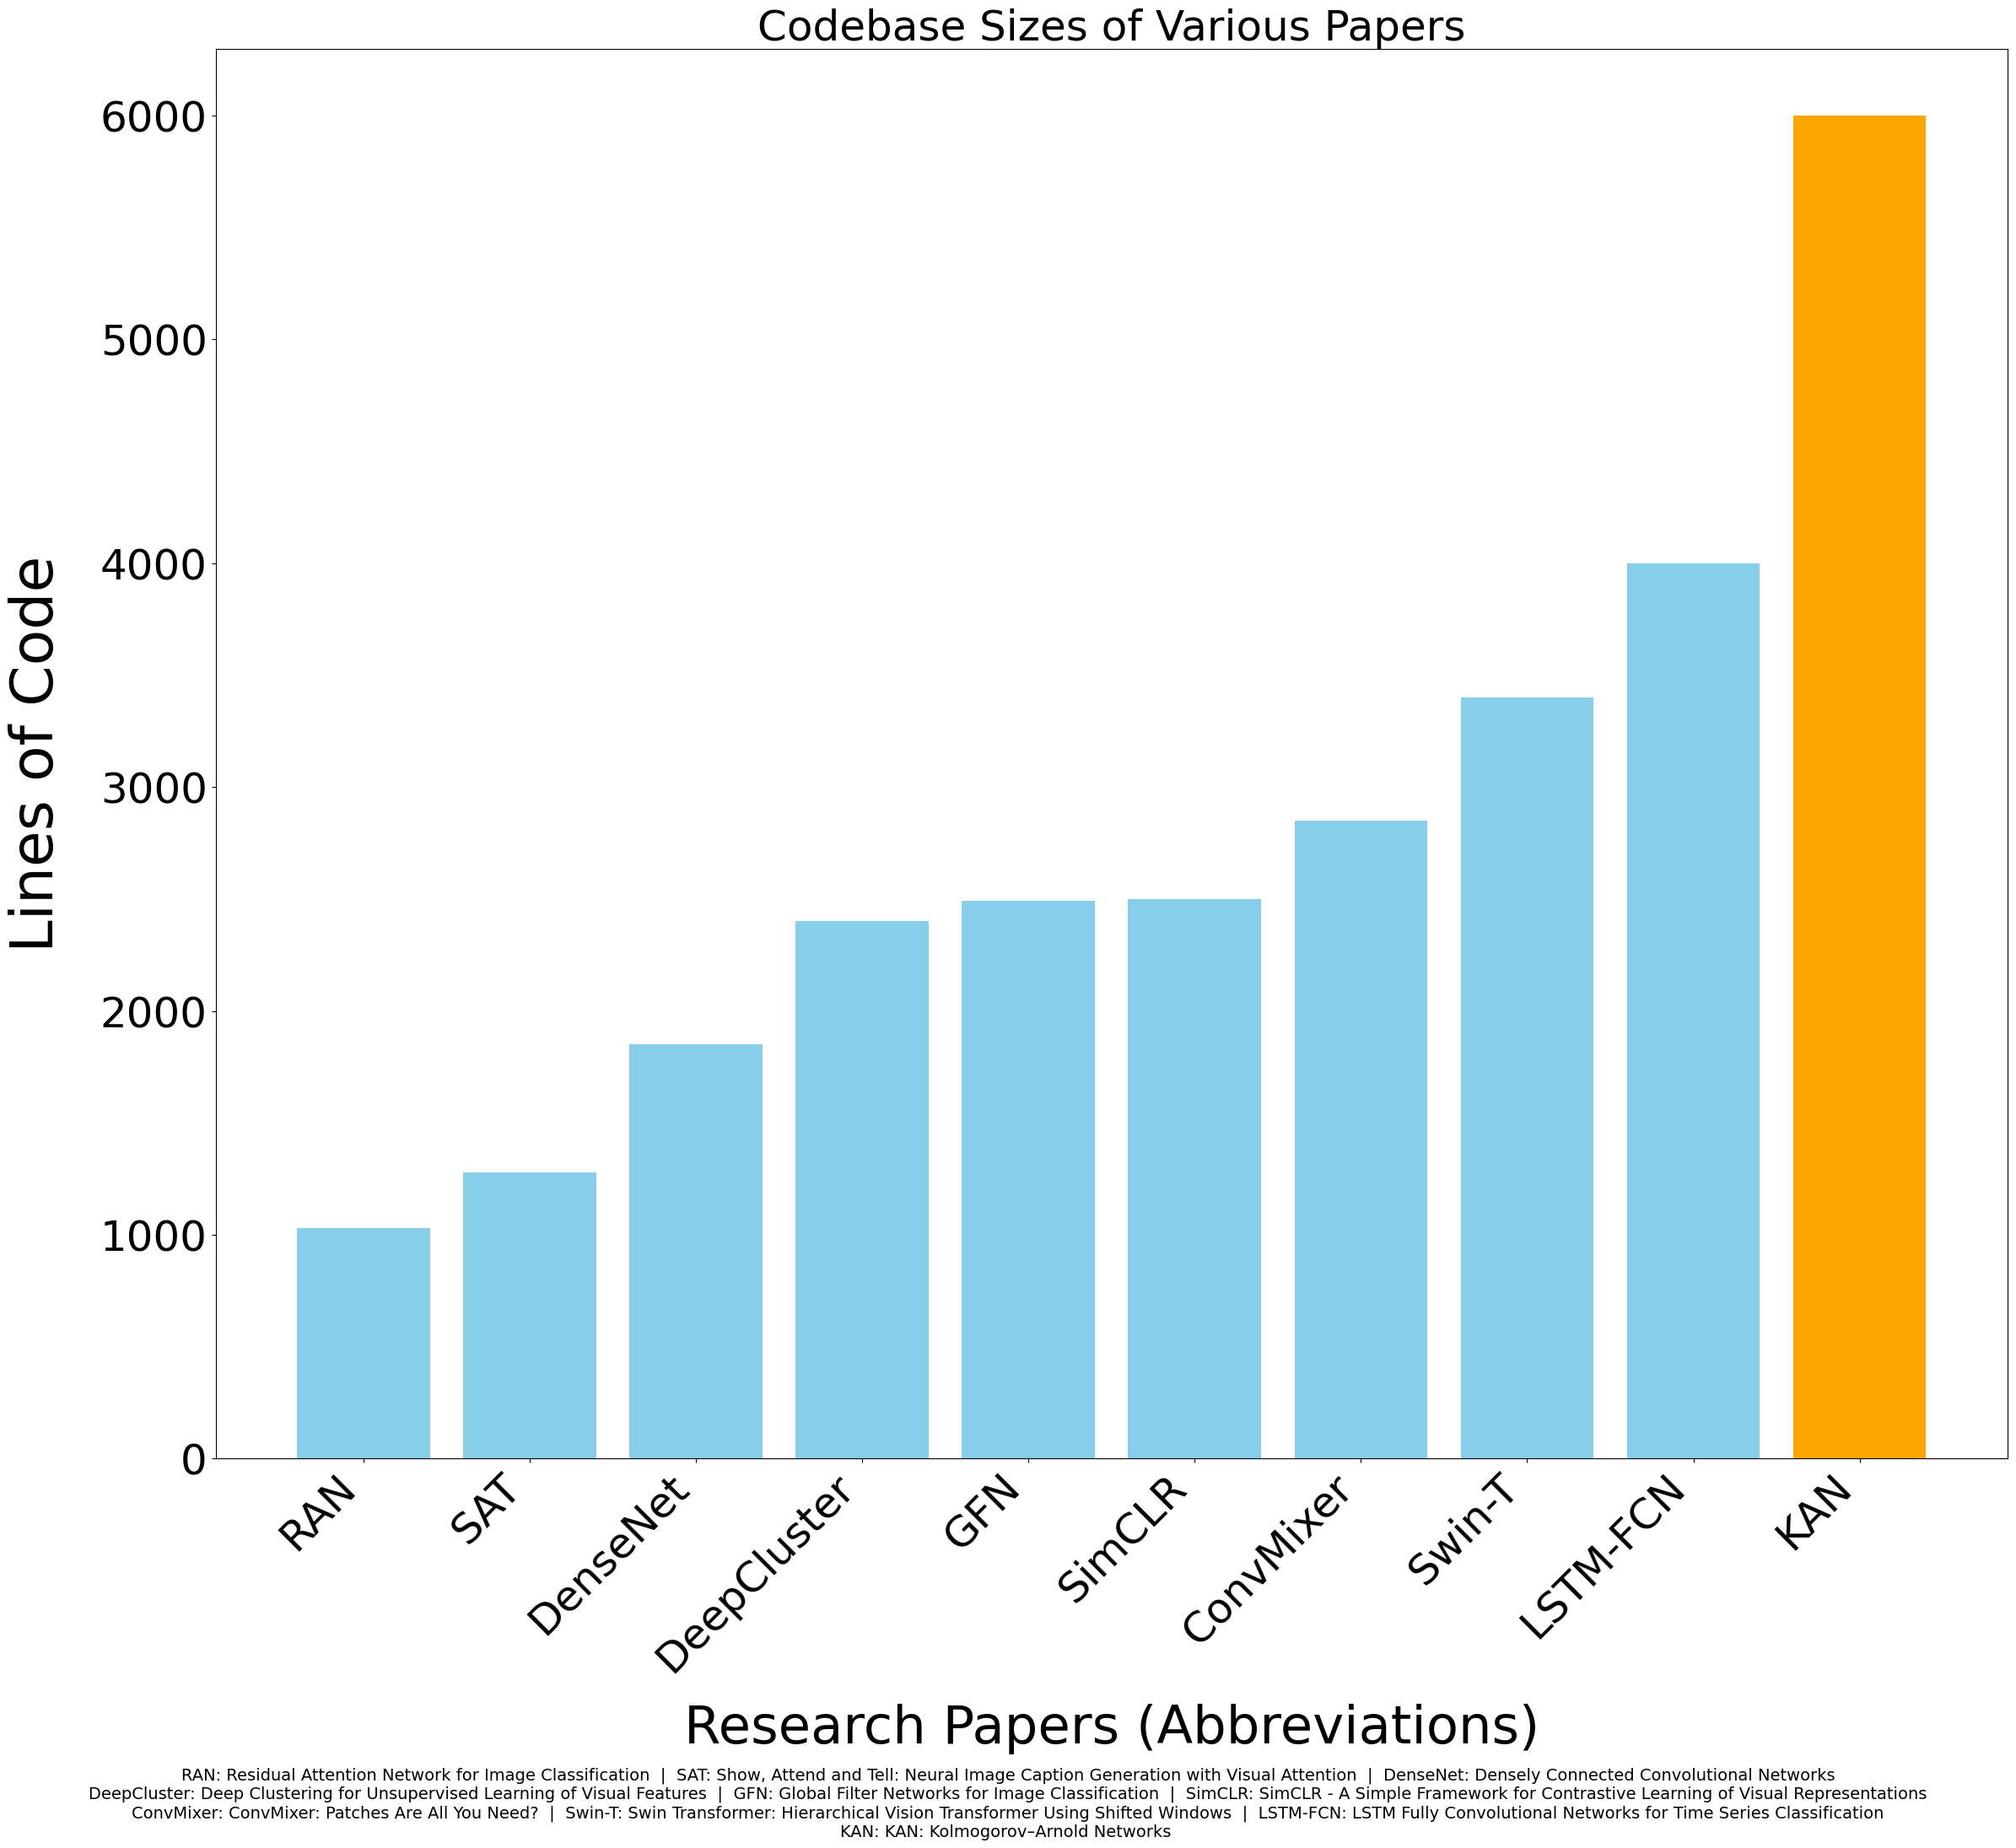

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data with abbreviations
papers = [
    "RAN", "DenseNet", "SAT", "SimCLR", "GFN", 
    "ConvMixer", "LSTM-FCN", "KAN", "DeepCluster", "Swin-T"
]
full_names = {
    "RAN": "Residual Attention Network for Image Classification",
    "DenseNet": "Densely Connected Convolutional Networks",
    "SAT": "Show, Attend and Tell: Neural Image Caption Generation with Visual Attention",
    "SimCLR": "SimCLR - A Simple Framework for Contrastive Learning of Visual Representations",
    "GFN": "Global Filter Networks for Image Classification",
    "ConvMixer": "ConvMixer: Patches Are All You Need?",
    "LSTM-FCN": "LSTM Fully Convolutional Networks for Time Series Classification",
    "KAN": "KAN: Kolmogorov–Arnold Networks ",
    "DeepCluster": "Deep Clustering for Unsupervised Learning of Visual Features",
    "Swin-T": "Swin Transformer: Hierarchical Vision Transformer Using Shifted Windows"
}
lines_of_code = [1030, 1850, 1280, 2500, 2490, 2850, 4000, 6000, 2400, 3400]

# Function to create a multi-column text layout
def create_multicolumn_text(sorted_keys, full_names_dict, num_columns=3):
    rows = []
    for i in range(0, len(sorted_keys), num_columns):
        row = [f"{sorted_keys[j]}: {full_names_dict[sorted_keys[j]]}" 
               for j in range(i, min(i + num_columns, len(sorted_keys)))]
        rows.append("  |  ".join(row))
    return "\n".join(rows)

# Sort data by lines of code
sorted_indices = np.argsort(lines_of_code)
sorted_papers = [papers[i] for i in sorted_indices]
sorted_lines_of_code = [lines_of_code[i] for i in sorted_indices]

formatted_text = create_multicolumn_text(sorted_papers, full_names, num_columns=3)

# Highlight KAN specifically with color
colors = ['skyblue' if paper != "KAN" else 'orange' for paper in sorted_papers]

# Plot vertical bar chart
plt.figure(figsize=(24, 21))
bars = plt.bar(sorted_papers, sorted_lines_of_code, color=colors)

# Style x-ticks and labels
plt.xticks(rotation=45, ha="right", fontsize=36)
plt.yticks(fontsize=36)
plt.ylabel("Lines of Code", fontsize=50, labelpad=30)
plt.xlabel("Research Papers (Abbreviations)", fontsize=45, labelpad=20)
plt.title("Codebase Sizes of Various Papers", fontsize=36)

# Add formatted text below the chart
plt.figtext(0.5, 0, formatted_text, ha="center", va="top", fontsize=14, wrap=True)

plt.tight_layout()
plt.savefig("output.png", dpi=200, bbox_inches='tight')
plt.show()


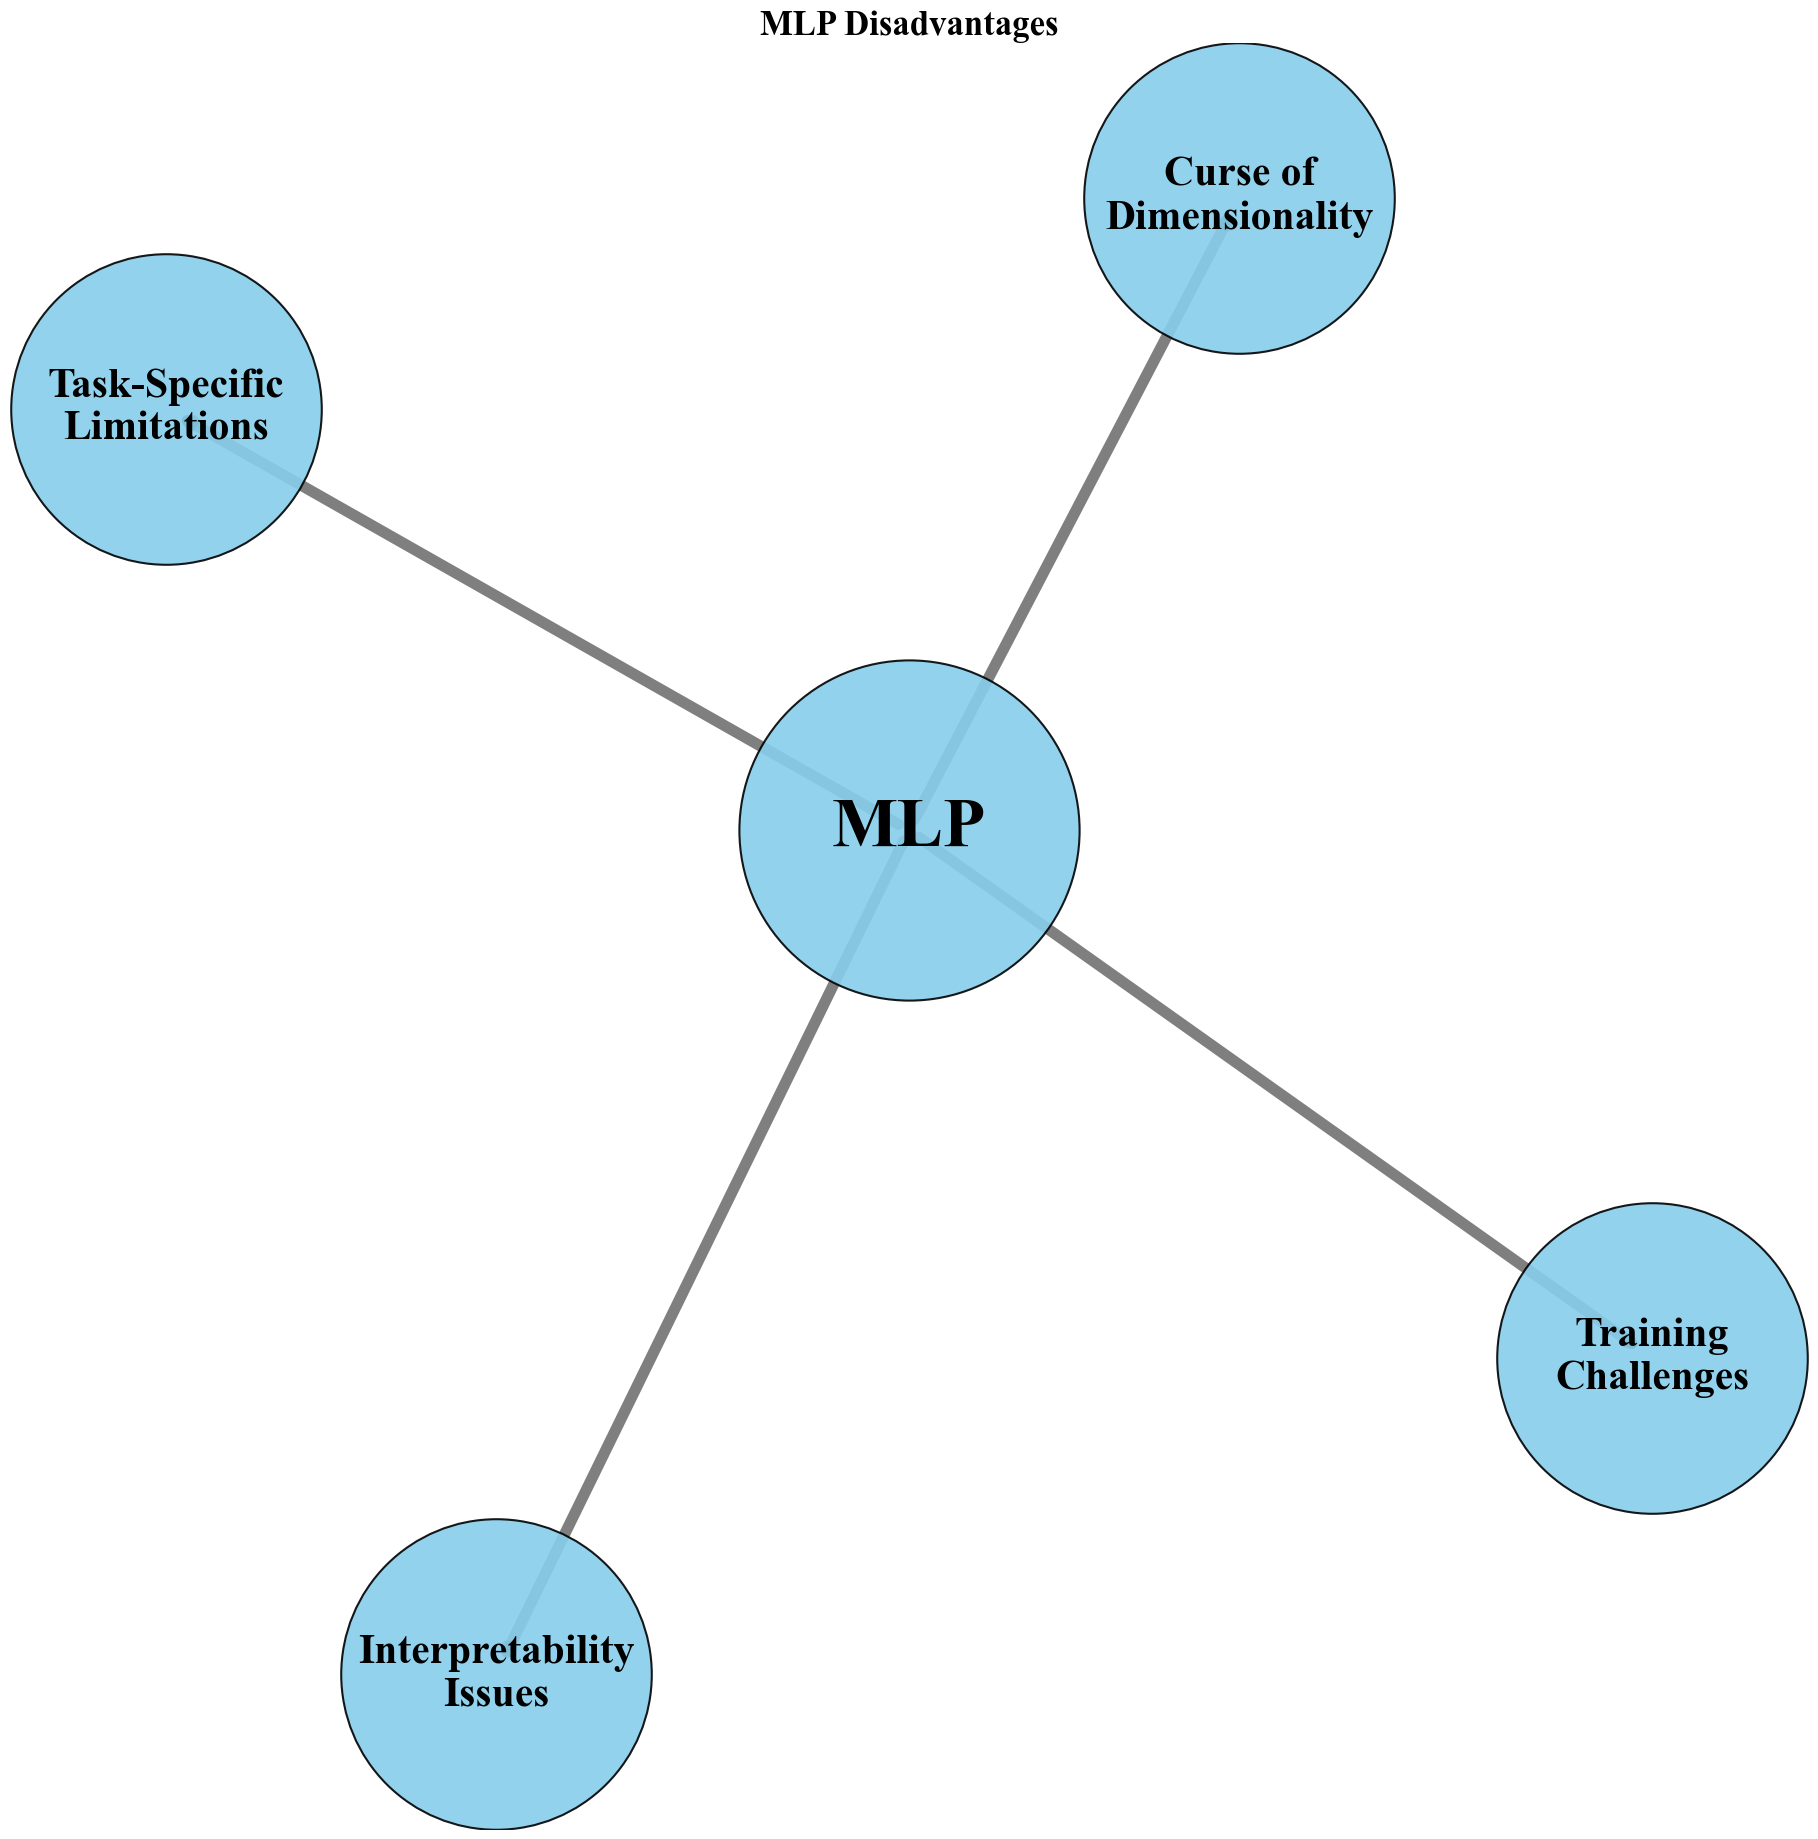

In [67]:
import matplotlib.pyplot as plt
import networkx as nx

mlp_issues = {
    "Curse of\nDimensionality": "Exponential parameter growth",
    "Interpretability\nIssues": "Difficult to interpret results",
    "Training\nChallenges": "Gradient vanishing and exploding",
    "Task-Specific\nLimitations": "Poor performance on specialized tasks"
}

G = nx.DiGraph()

G.add_node("MLP")

for issue in mlp_issues.keys():
    G.add_node(issue)
    G.add_edge("MLP", issue)

pos = {
    "MLP": (0, 0),
    "Curse of\nDimensionality": (0.1, 0.15),
    "Interpretability\nIssues": (-0.125, -0.2),
    "Training\nChallenges": (0.225, -0.125),
    "Task-Specific\nLimitations": (-0.225, 0.1)
}

plt.figure(figsize=(23.2, 23.2))

nx.draw_networkx_edges(G, pos, width=8, alpha=0.5)

for node in G.nodes():
    x, y = pos[node]
    size = 60000 if node == "MLP" else 50000
    plt.scatter(x, y, s=size, color='skyblue', alpha=0.9, edgecolors='k', linewidth=1.5)

    fsize = 50 if node == "MLP" else 30
    plt.text(x, y, node, fontsize=fsize, ha='center', va='center', 
             fontweight='bold', fontfamily="Times New Roman", color="black")

plt.title("MLP Disadvantages", fontsize=25, fontweight="bold", fontfamily="Times New Roman")
plt.axis("off")
plt.show()


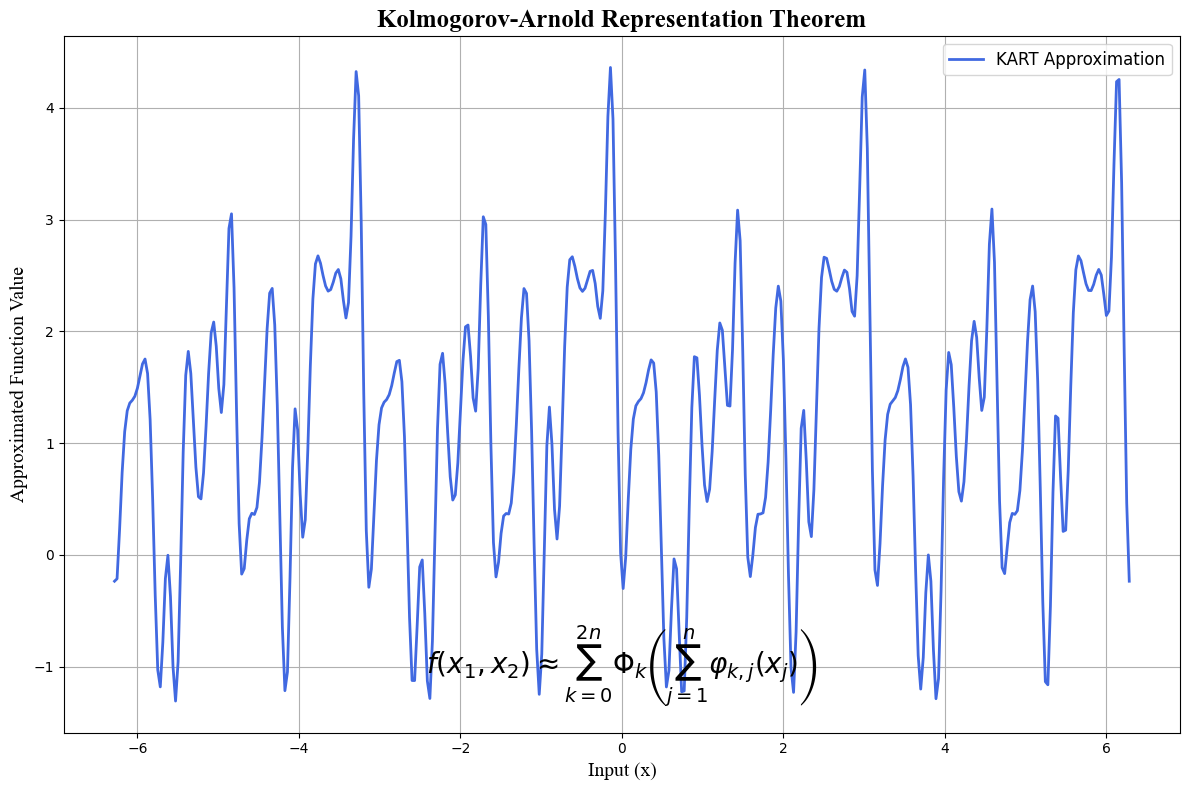

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def phi_kj(x, k, j):
    return np.sin(k * x + j)

def Phi_k(u, k):
    return np.cos(k * u)

def f_approx(x, n):
    result = 0
    for k in range(2 * n + 1):
        inner_sum = sum(phi_kj(x[j], k, j) for j in range(n))
        result += Phi_k(inner_sum, k)
    return result

n = 2  
x_range = np.linspace(-2 * np.pi, 2 * np.pi, 400) 
x = [x_range] * n  

y_values = [f_approx([x_j[i] for x_j in x], n) for i in range(len(x_range))]

plt.figure(figsize=(12, 8))

plt.plot(x_range, y_values, label="KART Approximation", color="royalblue", linewidth=2)

formula = r"$f(x_1, x_2) \approx \sum_{k=0}^{2n} \Phi_k\left( \sum_{j=1}^n \varphi_{k,j}(x_j) \right)$"
plt.text(0, -1, formula, fontsize=20, fontfamily="Times New Roman", ha='center', va='center')

plt.title("Kolmogorov-Arnold Representation Theorem", fontsize=18, fontweight='bold', fontfamily="Times New Roman")
plt.xlabel("Input (x)", fontsize=14, fontfamily="Times New Roman")
plt.ylabel("Approximated Function Value", fontsize=14, fontfamily="Times New Roman")
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


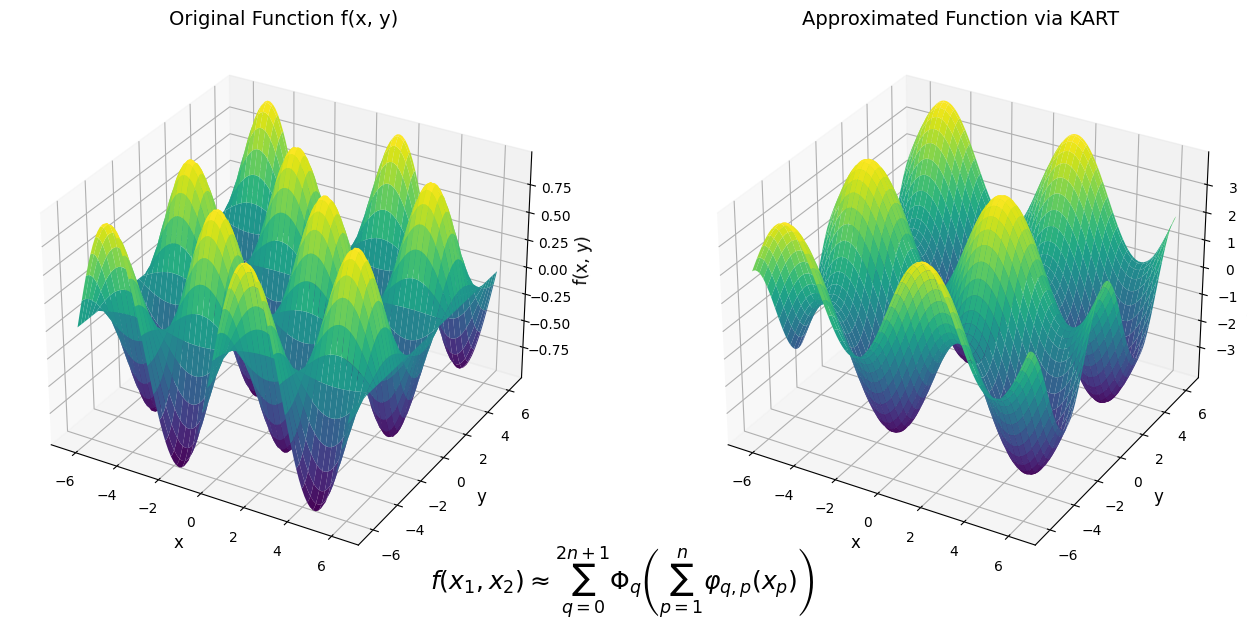

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def original_function(x, y):
    return np.sin(x) * np.cos(y)

def phi_01(x):
    return np.sin(x)

def phi_02(y):
    return np.cos(y)

def Phi_0(u):
    return u

def Phi_1(v):
    return v

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)
Z_original = original_function(X, Y)

U = phi_01(X)
V = phi_02(Y)

Z_approx = Phi_0(U + V) + Phi_1(U + V)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_original, cmap='viridis')
ax1.set_title('Original Function f(x, y)', fontsize=14)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('f(x, y)', fontsize=12)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_approx, cmap='viridis')
ax2.set_title('Approximated Function via KART', fontsize=14)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('Approximation', fontsize=12)

formula = r"$f(x_1, x_2) \approx \sum_{q=0}^{2n+1} \Phi_q\left( \sum_{p=1}^n \varphi_{q,p}(x_p) \right)$"
fig.text(0.5, 0.02, formula, fontsize=18, fontfamily="Times New Roman", ha='center', va='center')

plt.tight_layout()
plt.show()
